 <h1><b>Study on Regression</b></h1>

</h6>By Navneeth Krishnan 
           </h6>

https://github.com/navneeth-k/Machine_Learning

In [1]:
#Importing all the required modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

<h2>Reading the Data and performing Exploratory Data Analysis</h2>

<h3><b>Reading and Understanding the Data</b></h3>

In [3]:
#Loading the Dataset into Jupyter
df = pd.read_csv('Data_Regression.csv',sep=',')
print(df)

      Cost Weight  Weight1 Length   Height   Width
0    242.0   23.2     25.4     30  11.5200    4.02
1    290.0     24     26.3   31.2  12.4800  4.3056
2    340.0   23.9     26.5   31.1  12.3778  4.6961
3    363.0   26.3     29.0   33.5  12.7300  4.4555
4    430.0   26.5     29.0     34  12.4440   5.134
..     ...    ...      ...    ...      ...     ...
154   12.2   11.5     12.2   13.4   2.0904  1.3936
155   13.4   11.7     12.4   13.5   2.4300   1.269
156   12.2   12.1     13.0   13.8   2.2770  1.2558
157   19.7   13.2     14.3   15.2   2.8728  2.0672
158   19.9   13.8     15.0   16.2   2.9322  1.8792

[159 rows x 6 columns]


In [6]:
#Examining the first 5 rows 
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [7]:
#Examining the last 5 rows 
df.tail()

,Cost,Weight,Weight1,Length,Height,Width
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.269
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


In [8]:
#Examing the no. of rows and columns
df.shape

(159, 6)

In [9]:
#Checking the Data Types and No: of Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [10]:
#Re-Ordering the Columns
df = df[["Weight","Weight1","Length","Height","Width","Cost"]]

In [11]:
#Confirming that the Columns are re-arranged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    object 
 1   Weight1  159 non-null    float64
 2   Length   159 non-null    object 
 3   Height   158 non-null    float64
 4   Width    158 non-null    object 
 5   Cost     159 non-null    float64
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [12]:
#Replace the Strings as NaN 
df['Weight'] = pd.to_numeric(df['Weight'],errors='coerce')
df['Length'] = pd.to_numeric(df['Length'],errors='coerce')
df['Width'] = pd.to_numeric(df['Width'],errors='coerce')

In [13]:
#Checking for the NULLs in the dataset after performing to_numeric
print(df.isnull().sum())

Weight     2
Weight1    0
Length     1
Height     1
Width      2
Cost       0
dtype: int64


In [14]:
#Checking the Info to confirm that the datatype is consistent 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   157 non-null    float64
 1   Weight1  159 non-null    float64
 2   Length   158 non-null    float64
 3   Height   158 non-null    float64
 4   Width    157 non-null    float64
 5   Cost     159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
None


<h3><b>Co-relating the data</b></h3>

,Weight,Weight1,Length,Height,Width,Cost
Weight,1.000000,0.999523,0.992159,0.627608,0.238791,0.915702
Weight1,0.999523,1.000000,0.994102,0.641689,0.236496,0.918618
Length,0.992159,0.994102,1.000000,0.703750,0.226611,0.923123
Height,0.627608,0.641689,0.703750,1.000000,0.012421,0.724575
Width,0.238791,0.236496,0.226611,0.012421,1.000000,0.268487
Cost,0.915702,0.918618,0.923123,0.724575,0.268487,1.000000


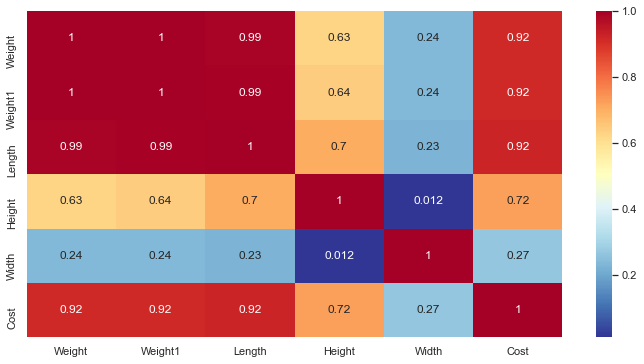

In [15]:
#Heatmap, describing various inter-dependancies between the Features 
#Also, performing a Correlation between the Features
plt.figure(figsize=(12,6))
c= df.corr()
sns.heatmap(c,cmap='RdYlBu_r',annot=True)
c

<blockquote>From the Heatmap and the Correlation, we can conclude that 'Weight' and 'Weight1' are very similar and hence we can drop 'Weight1' from the Dataset, in the similar manner we can also drop Length, as Length and Weight are very similar
</blockquote>

In [16]:
#Dropping this columns as NOT using it
df = df.drop(['Weight1','Length'],axis=1)

In [17]:
#Checking if the above step is effective 
df.head()

,Weight,Height,Width,Cost
0,23.2,11.5200,4.0200,242.0
1,24.0,12.4800,4.3056,290.0
2,23.9,12.3778,4.6961,340.0
3,26.3,12.7300,4.4555,363.0
4,26.5,12.4440,5.1340,430.0


In [18]:
#Checcking the Shape after drop
df.shape

(159, 4)

<h3><b>Check for Duplicates and Nulls</b></h3>

In [19]:
#Checking for Duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("no: of duplicates: ",duplicate_rows_df.shape)
#Since there are no duplicates we need not remove any of the rows

no: of duplicates:  (0, 4)


In [20]:
#Checking for Nulls
print(df.isnull().sum())

Weight    2
Height    1
Width     2
Cost      0
dtype: int64


In [21]:
#Checking the data types of the Columns  
df.dtypes

Weight    float64
Height    float64
Width     float64
Cost      float64
dtype: object

In [22]:
#Calculating the Median for all the columns
med_Wgt = df['Weight'].median()
med_Hgt = df['Height'].median()
med_Wdt = df['Width'].median()
med_Cst = df['Cost'].median()
print(med_Wgt,med_Hgt,med_Wdt,med_Cst)

25.2 7.733 4.2485 273.0


In [23]:
#Replace the NULLs with the Median value for each of the Features
df['Weight'] = df['Weight'].fillna(med_Wgt)
df['Height'] = df['Height'].fillna(med_Hgt)
df['Width'] = df['Width'].fillna(med_Wdt)

In [24]:
#Checking if the NULLs are replaced by the median correctly 
df.isnull().sum()

Weight    0
Height    0
Width     0
Cost      0
dtype: int64

In [25]:
#Checking the Datatypes again after all the Transformations
df.dtypes

Weight    float64
Height    float64
Width     float64
Cost      float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  159 non-null    float64
 1   Height  159 non-null    float64
 2   Width   159 non-null    float64
 3   Cost    159 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [27]:
df.describe()

,Weight,Height,Width,Cost
count,159.000000,159.000000,159.000000,159.000000
mean,26.246541,8.925576,3777.977521,398.326415
std,9.989816,4.260588,47582.744610,357.978317
min,7.500000,1.728400,1.047600,0.000000
25%,19.050000,5.944800,3.401600,120.000000
50%,25.200000,7.733000,4.248500,273.000000
75%,32.700000,12.143400,5.584500,650.000000
max,59.000000,18.957000,600000.000000,1650.000000


<h3><b>Outliers Detection and Treatment</b></h3>

<AxesSubplot:xlabel='Weight'>

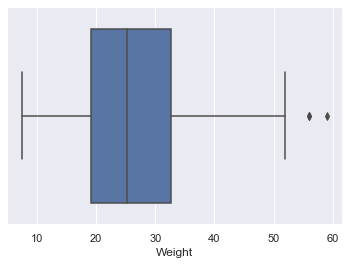

In [28]:
#Detecting Ouliers with Box Plot
sns.boxplot(x=df['Weight'])

(array([ 3., 11.,  7.,  8., 20., 16., 19., 10., 12., 15., 10., 12.,  7.,
         3.,  1.,  1.,  0.,  1.,  2.,  1.]),
 array([ 7.5  , 10.075, 12.65 , 15.225, 17.8  , 20.375, 22.95 , 25.525,
        28.1  , 30.675, 33.25 , 35.825, 38.4  , 40.975, 43.55 , 46.125,
        48.7  , 51.275, 53.85 , 56.425, 59.   ]),
 <BarContainer object of 20 artists>)

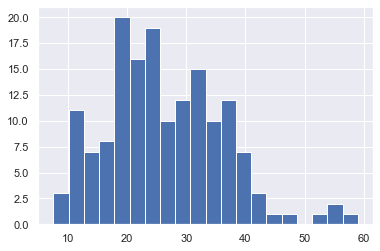

In [29]:
#We can also see from the Histogram that the outliers are after 50 which cause a disruption to form a Bell Curve
plt.hist(df['Weight'],bins=20)

In [30]:
#We can calculate the Skewness

print(df['Weight'].skew())
df['Weight'].describe()

#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
#If the skewness is less than -1 or greater than 1, the data are highly skewed
#Here skewness is Low, hence suggesting less ouliers

0.5902494787420377


count    159.000000
mean      26.246541
std        9.989816
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       59.000000
Name: Weight, dtype: float64

In [31]:
#Defining the IQR Function for Outlier Detection
def removeOutlier(col):
    sorted(col)
    q1,q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lr=q1-(1.5*IQR)
    ur=q2+(1.5*IQR)
    return lr,ur

In [32]:
#Performing the Outliers Treatment through IQR method
ls,hs=removeOutlier(df['Weight'])
df['Weight']=np.where(df['Weight']>hs,hs,df['Weight'])
df['Weight']=np.where(df['Weight']<ls,ls,df['Weight'])

<AxesSubplot:xlabel='Weight'>

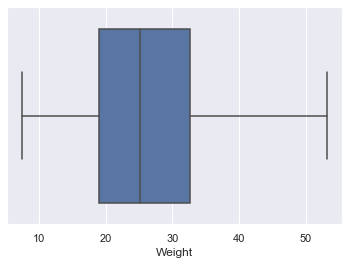

In [33]:
#Re-Checking with Box plot  to confirm elemination of Outliers
sns.boxplot(x=df['Weight'])

(array([ 2., 10.,  8.,  5.,  9., 25.,  9., 17.,  9.,  9., 15., 10., 12.,
         4.,  7.,  2.,  1.,  1.,  0.,  4.]),
 array([ 7.5    ,  9.78375, 12.0675 , 14.35125, 16.635  , 18.91875,
        21.2025 , 23.48625, 25.77   , 28.05375, 30.3375 , 32.62125,
        34.905  , 37.18875, 39.4725 , 41.75625, 44.04   , 46.32375,
        48.6075 , 50.89125, 53.175  ]),
 <BarContainer object of 20 artists>)

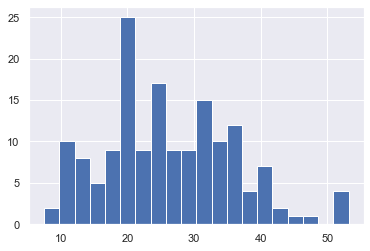

In [34]:
plt.hist(df['Weight'],bins=20)

<blockquote>Here, in the above histogram, we can see the difference after the Outlier Treatment</blockquote>

In [35]:
print(df['Weight'].skew())
df['Weight'].describe()
#The Skew value now suggests that the data is now fairly symmetrical and hence we can conclude the detection.

0.4517278461587331


count    159.000000
mean      26.174371
std        9.775683
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       53.175000
Name: Weight, dtype: float64

In [36]:
#Calculate Skewness for Height
print(df['Height'].skew())
df['Height'].describe()

0.4188725260362618


count    159.000000
mean       8.925576
std        4.260588
min        1.728400
25%        5.944800
50%        7.733000
75%       12.143400
max       18.957000
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

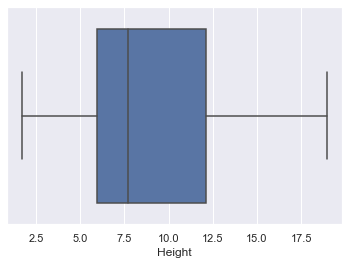

In [37]:
#Detecting Ouliers with Box Plot
sns.boxplot(x=df['Height'])

(array([13.,  2.,  3.,  4., 19., 21., 18.,  9.,  5.,  6., 12.,  7., 12.,
         2.,  7.,  5.,  6.,  2.,  3.,  3.]),
 array([ 1.7284 ,  2.58983,  3.45126,  4.31269,  5.17412,  6.03555,
         6.89698,  7.75841,  8.61984,  9.48127, 10.3427 , 11.20413,
        12.06556, 12.92699, 13.78842, 14.64985, 15.51128, 16.37271,
        17.23414, 18.09557, 18.957  ]),
 <BarContainer object of 20 artists>)

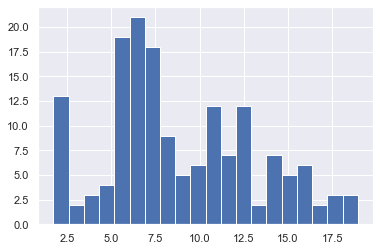

In [38]:
plt.hist(df['Height'],bins=20)

In [39]:
#Performing the Outliers Treatment through IQR method
ls,hs=removeOutlier(df['Height'])
df['Height']=np.where(df['Height']>hs,hs,df['Height'])
df['Height']=np.where(df['Height']<ls,ls,df['Height'])

In [40]:
#Calculate Skewness for Height
print(df['Height'].skew())
df['Height'].describe()

0.4188725260362618


count    159.000000
mean       8.925576
std        4.260588
min        1.728400
25%        5.944800
50%        7.733000
75%       12.143400
max       18.957000
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

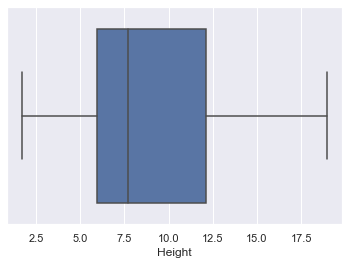

In [41]:
#Re-Checking with Box plot  to confirm elemination of Outliers
sns.boxplot(x=df['Height'])

(array([13.,  2.,  3.,  4., 19., 21., 18.,  9.,  5.,  6., 12.,  7., 12.,
         2.,  7.,  5.,  6.,  2.,  3.,  3.]),
 array([ 1.7284 ,  2.58983,  3.45126,  4.31269,  5.17412,  6.03555,
         6.89698,  7.75841,  8.61984,  9.48127, 10.3427 , 11.20413,
        12.06556, 12.92699, 13.78842, 14.64985, 15.51128, 16.37271,
        17.23414, 18.09557, 18.957  ]),
 <BarContainer object of 20 artists>)

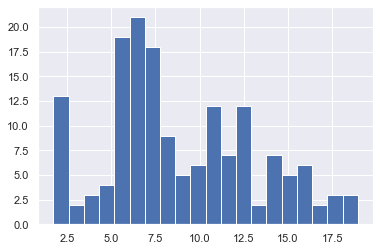

In [42]:
plt.hist(df['Height'],bins=20)

<blockquote>Here, we can conclude that the data is fairly clean</blockquote>

In [43]:
#Calculate Skewness for Width
print(df['Width'].skew())
df['Width'].describe()
#Here from the Skewness range we can see that Data may have many outliers, we can detect with Box Plot

12.609520189539325


count       159.000000
mean       3777.977521
std       47582.744610
min           1.047600
25%           3.401600
50%           4.248500
75%           5.584500
max      600000.000000
Name: Width, dtype: float64

<AxesSubplot:xlabel='Width'>

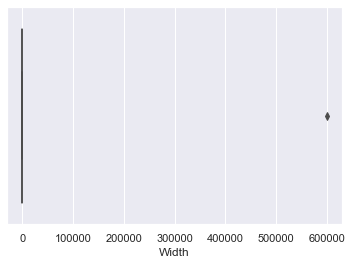

In [44]:
#Detecting Ouliers with Box Plot
sns.boxplot(x=df['Width'])

(array([158.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.04760000e+00, 3.00009952e+04, 6.00009428e+04, 9.00008905e+04,
        1.20000838e+05, 1.50000786e+05, 1.80000733e+05, 2.10000681e+05,
        2.40000629e+05, 2.70000576e+05, 3.00000524e+05, 3.30000471e+05,
        3.60000419e+05, 3.90000367e+05, 4.20000314e+05, 4.50000262e+05,
        4.80000210e+05, 5.10000157e+05, 5.40000105e+05, 5.70000052e+05,
        6.00000000e+05]),
 <BarContainer object of 20 artists>)

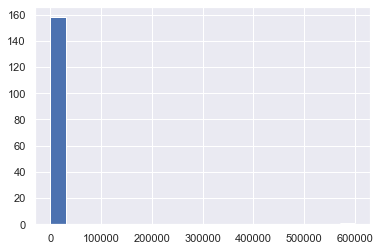

In [45]:
plt.hist(df['Width'],bins=20)

In [46]:
#Performing the Outliers Treatment through IQR method
ls,hs=removeOutlier(df['Width'])
df['Width']=np.where(df['Width']>hs,hs,df['Width'])
df['Width']=np.where(df['Width']<ls,ls,df['Width'])

<AxesSubplot:xlabel='Width'>

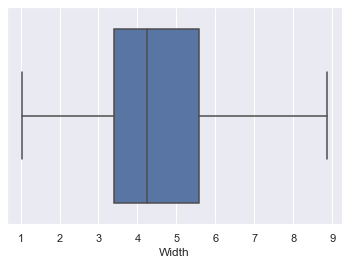

In [47]:
#Again, Detecting Ouliers with Box Plot
sns.boxplot(x=df['Width'])

In [48]:
#Calculate Skewness for Width
print(df['Width'].skew())
df['Width'].describe()
#Now, we can see that we have the skewness within range through Outlier Treatment

0.09386197533592153


count    159.000000
mean       4.448331
std        1.699199
min        1.047600
25%        3.401600
50%        4.248500
75%        5.584500
max        8.858850
Name: Width, dtype: float64

(array([12.,  0.,  3.,  4.,  7., 13., 21., 14., 16., 12., 12.,  7.,  5.,
        10., 10.,  4.,  6.,  1.,  1.,  1.]),
 array([1.0476   , 1.4381625, 1.828725 , 2.2192875, 2.60985  , 3.0004125,
        3.390975 , 3.7815375, 4.1721   , 4.5626625, 4.953225 , 5.3437875,
        5.73435  , 6.1249125, 6.515475 , 6.9060375, 7.2966   , 7.6871625,
        8.077725 , 8.4682875, 8.85885  ]),
 <BarContainer object of 20 artists>)

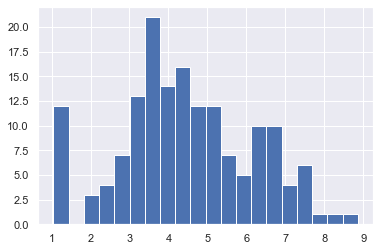

In [49]:
plt.hist(df['Width'],bins=20)

In [50]:
#Calculate Skewness for Cost
print(df['Cost'].skew())
df['Cost'].describe()
#Here from the Skewness range we can see that Data may have many outliers, we can detect with Box Plot

1.1044503929261893


count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Cost, dtype: float64

<AxesSubplot:xlabel='Cost'>

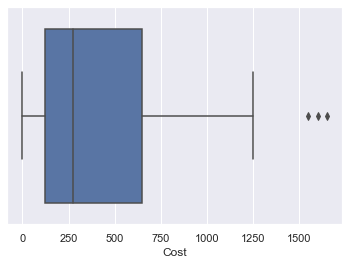

In [51]:
#Detecting Ouliers with Box Plot
sns.boxplot(x=df['Cost'])

(array([27., 32., 13., 18.,  6.,  6., 12.,  6., 12.,  4.,  5.,  6.,  6.,
         2.,  0.,  1.,  0.,  0.,  1.,  2.]),
 array([   0. ,   82.5,  165. ,  247.5,  330. ,  412.5,  495. ,  577.5,
         660. ,  742.5,  825. ,  907.5,  990. , 1072.5, 1155. , 1237.5,
        1320. , 1402.5, 1485. , 1567.5, 1650. ]),
 <BarContainer object of 20 artists>)

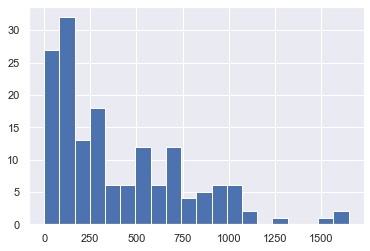

In [52]:
plt.hist(df['Cost'],bins=20)

In [53]:
#Performing the Outliers Treatment through IQR method
ls,hs=removeOutlier(df['Cost'])
df['Cost']=np.where(df['Cost']>hs,hs,df['Cost'])
df['Cost']=np.where(df['Cost']<ls,ls,df['Cost'])

<AxesSubplot:xlabel='Cost'>

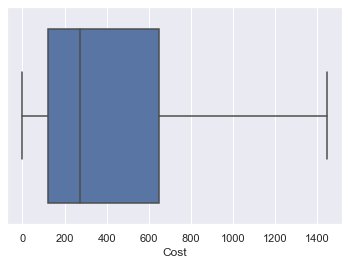

In [54]:
#Again, Detecting Ouliers with Box Plot
sns.boxplot(x=df['Cost'])

In [55]:
#Calculate Skewness for Cost
print(df['Cost'].skew())
df['Cost'].describe()
#Skewness has dropped to Moderate

0.9519553539523697


count     159.000000
mean      395.401887
std       348.555952
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1445.000000
Name: Cost, dtype: float64

(array([24., 24., 21., 11., 13.,  5.,  9.,  7.,  6., 11.,  2.,  6.,  4.,
         9.,  1.,  2.,  0.,  1.,  0.,  3.]),
 array([   0.  ,   72.25,  144.5 ,  216.75,  289.  ,  361.25,  433.5 ,
         505.75,  578.  ,  650.25,  722.5 ,  794.75,  867.  ,  939.25,
        1011.5 , 1083.75, 1156.  , 1228.25, 1300.5 , 1372.75, 1445.  ]),
 <BarContainer object of 20 artists>)

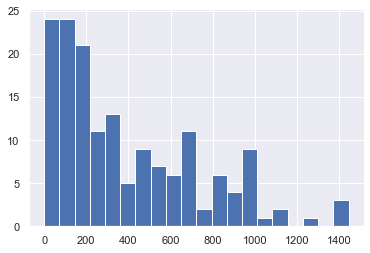

In [56]:
plt.hist(df['Cost'],bins=20)

In [57]:
#Exporting the data for Backup 
#df.to_csv(r'EDA_AfterCleaningOutliers_Final.csv',index=False)

 <h3><b>Representation of the data in various plots, graphs, Correlations</b></h3>

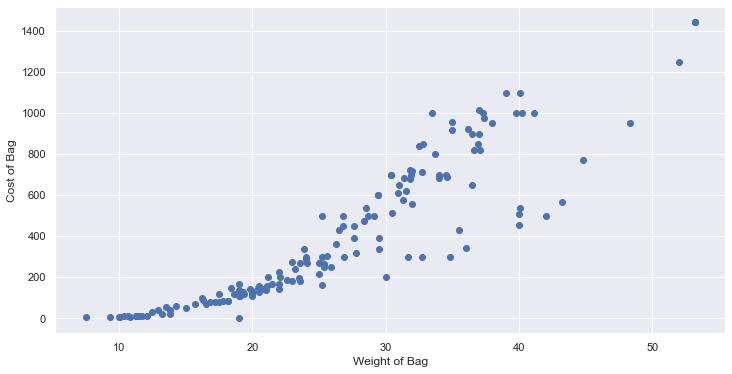

In [58]:
#Scatter Plot between Length and Cost after Outlier Detection and Treatment
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Weight'], df['Cost'])
ax.set_xlabel('Weight of Bag')
ax.set_ylabel('Cost of Bag')
plt.show()

<AxesSubplot:>

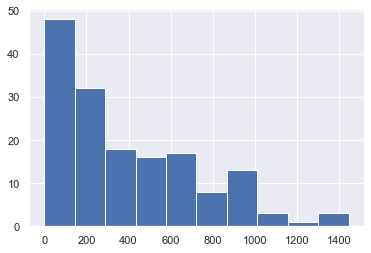

In [59]:
df.Cost.hist()

,Weight,Height,Width,Cost
Weight,1.000000,0.634001,0.878013,0.910457
Height,0.634001,1.000000,0.768553,0.739797
Width,0.878013,0.768553,1.000000,0.910019
Cost,0.910457,0.739797,0.910019,1.000000


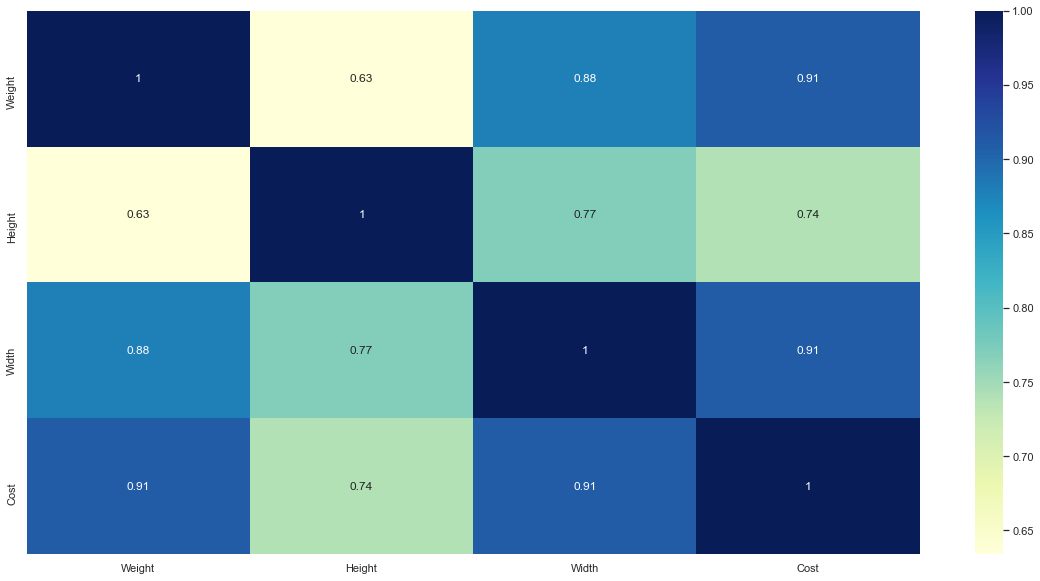

In [60]:
#Heatmap, describing various inter-dependancies between the variables 
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='YlGnBu',annot=True)
c

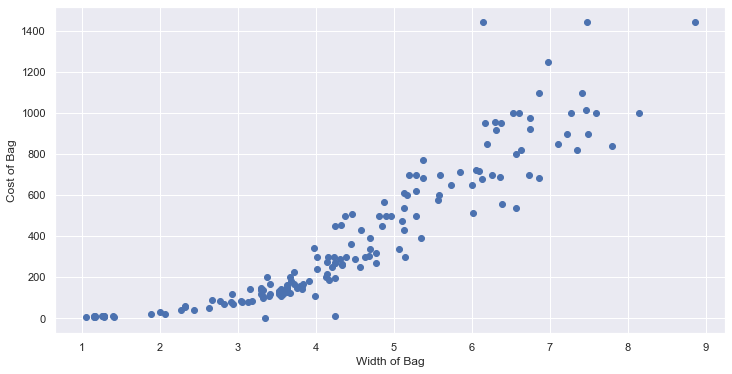

In [61]:
#From the Heatmap we can see that Length and Width are most influential on the target 'price'
#Scatter plot to understand relation of Width and Cost 
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Width'], df['Cost'])
ax.set_xlabel('Width of Bag')
ax.set_ylabel('Cost of Bag')
plt.show()

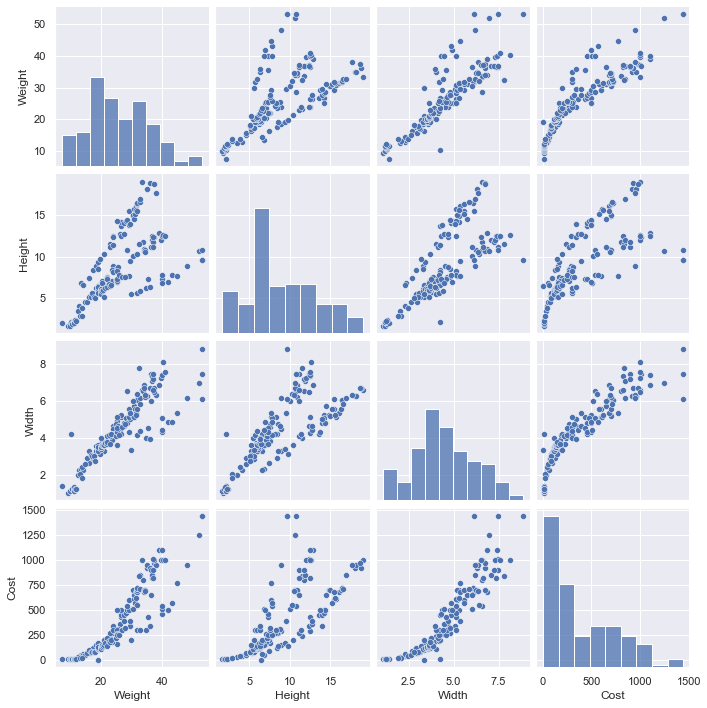

In [62]:
#Below Graph represents all the correlations between all the variables used in the model
sns.pairplot(df)
plt.show()

<blockquote>Here, we end our Exploratory Data Analysis and also representation of the data in form of various Graphs</blockquote>

# Data Split and Scaling Operations

In [63]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm

In [64]:
print(df)

     Weight   Height   Width   Cost
0      23.2  11.5200  4.0200  242.0
1      24.0  12.4800  4.3056  290.0
2      23.9  12.3778  4.6961  340.0
3      26.3  12.7300  4.4555  363.0
4      26.5  12.4440  5.1340  430.0
..      ...      ...     ...    ...
154    11.5   2.0904  1.3936   12.2
155    11.7   2.4300  1.2690   13.4
156    12.1   2.2770  1.2558   12.2
157    13.2   2.8728  2.0672   19.7
158    13.8   2.9322  1.8792   19.9

[159 rows x 4 columns]


In [65]:
#Storing the Cost data in a separate df
df_cost = df['Cost']

In [66]:
#Storing all the other Features in a separate variable
df_group = df  

In [67]:
#Droping the target from the df of the Features
df_group = df_group.drop(['Cost'],axis=1)

In [68]:
df_cost.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Cost, dtype: float64

In [69]:
df_group.head()

,Weight,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340


In [70]:
#Splitting the data into Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(df_group, df_cost, test_size=0.2, random_state=42) 

In [71]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()

In [72]:
#Performing Scaling Operations in order to get better results
scale = scaler.fit_transform(df.values)
df_scaled1 = pd.DataFrame(scale, index=df.index, columns=df.columns)
    
df_scaled_cost = df_scaled1['Cost'] 
df_scaled = df_scaled1.drop(['Cost'],axis=1)

In [73]:
df_scaled_cost

0     -0.441497
1     -0.303351
2     -0.159449
3     -0.093254
4      0.099575
         ...   
154   -1.102872
155   -1.099418
156   -1.102872
157   -1.081287
158   -1.080711
Name: Cost, Length: 159, dtype: float64

In [74]:
df_scaled

,Weight,Height,Width
0,-0.305224,0.610860,-0.252875
1,-0.223129,0.836893,-0.084264
2,-0.233391,0.812829,0.146276
3,0.012892,0.895755,0.004232
4,0.033415,0.828416,0.404800
...,...,...,...
154,-1.505852,-1.609349,-1.803427
155,-1.485329,-1.529390,-1.876988
156,-1.444282,-1.565414,-1.884781
157,-1.331402,-1.425132,-1.405753


In [75]:
#Splitting into Training and Test data post-scaling operations
x_trainS, x_testS, y_trainS, y_testS = train_test_split(df_scaled, df_scaled_cost, test_size=0.2, random_state=42) 

In [76]:
x_testS.count()

Weight    32
Height    32
Width     32
dtype: int64

# Ordinary Least Squares - OLS

In [77]:
#Fitting into the OLS Model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [78]:
print('Co-efficient obtained is: ',reg.coef_)
print('Intercept obtained is: ',reg.intercept_)

Co-efficient obtained is:  [18.1451222   9.24076791 78.00687999]
Intercept obtained is:  -521.1901121906578


In [79]:
#Predicted Vaalues of Cost
y_pred

array([  75.33923018, -187.44638577,  337.93617351,  315.81812648,
        190.93334811,  776.92814723, -232.36953377,  277.21527075,
        276.07249675, 1065.97611617,  621.8499083 ,  778.77828442,
        590.21384572,  151.71749152,  643.69442938,  772.49875867,
        959.84645571,  321.93627777,  235.8151107 ,  580.04067352,
       -195.54686277,  584.4268089 ,  474.71256934,  454.39899653,
        771.81850046,  900.59242179,  217.49146162,  322.78931331,
       -254.65262105, -204.74387392,  615.51569452,   35.54218695])

In [80]:
#Actual Values of Cost
y_test

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1250.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
Name: Cost, dtype: float64

In [81]:
num_data = x_train.shape[0]
print(num_data)

127


In [82]:
#Calculating the RSE, MSE, R2
mse_ols = mean_squared_error(y_test,y_pred)
rmse_ols = math.sqrt(mse_ols)
rse_ols = mse_ols*num_data
rse_ols /= num_data-2
rse_ols = math.sqrt(rse_ols)


In [83]:
#R2 Score 
from sklearn.metrics import r2_score
r2_OLS = r2_score(y_test,y_pred)
r2_OLS

0.8739712540387259

In [84]:
print('RMSE=',rmse_ols)
print('RSE=',rse_ols)

RMSE= 133.8889052399756
RSE= 134.95576597352525


In [85]:
#Printing the summary of the OLS
regressor_OLS = sm.OLS(endog = y_test, exog = x_test).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Cost   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              74.31
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.01e-13
Time:                        08:48:25   Log-Likelihood:                         -214.58
No. Observations:                  32   AIC:                                      435.2
Df Residuals:                      29   BIC:                                      439.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         1.3051      8.439      0.155      0.878     -15.956      18.566
Height        16.0233     13.400      1.196      0.241     -11.382      43.429
Width         71.8870     64.470      1.115      0.274     -59.970     203.744
==============================================================================
Omnibus:                        9.444   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.220
Skew:                           1.180   Prob(JB):                       0.0164
Kurtosis:                       3.773   Cond. No.                         54.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

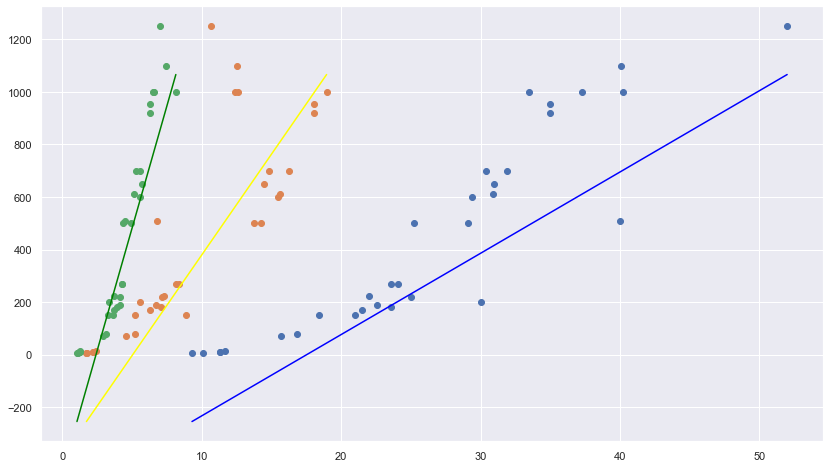

In [86]:
#Scatter Plot describing the Relation of Features and Cost with the Predicted Cost
plt.figure(figsize=(14, 8))
plt_wgt = plt.scatter(x_test['Weight'], y_test)
plt_wgt = plt.plot([min(x_test['Weight']),max(x_test['Weight'])],[min(y_pred),max(y_pred)],color = 'blue')
plt_hgt = plt.scatter(x_test['Height'], y_test)
plt_hgt = plt.plot([min(x_test['Height']),max(x_test['Height'])],[min(y_pred),max(y_pred)],color = 'yellow')
plt_wdt = plt.scatter(x_test['Width'], y_test)
plt_wdt = plt.plot([min(x_test['Width']),max(x_test['Width'])],[min(y_pred),max(y_pred)],color = 'green')
plt.show(plt_wgt)
plt.show(plt_hgt)
plt.show(plt_wdt)

<blockquote>From the above graph we can see the Actual vs Predicted Cost for the Bags through OLS</blockquote>

# Stochastic Gradient Descent

In [87]:
#Stochastic Gradient Descent with SGDRegressor
sgd_reg = linear_model.SGDRegressor(max_iter=100000, tol=0.001)
sgd_reg.fit(x_trainS,y_trainS)
y_pred_sgd = sgd_reg.predict(x_testS)
print("Intercept:",sgd_reg.intercept_)
print("Coefficients:",sgd_reg.coef_)
print(y_pred_sgd)

Intercept: [-0.02969131]
Coefficients: [0.45188458 0.1777638  0.37715404]
[-0.91537113 -1.68067213 -0.23167718 -0.21658175 -0.60789386  1.20963139
 -1.81108457 -0.34679435 -0.35010148  1.80636971  0.71114246  1.09210892
  0.64443966 -0.64886368  0.79596053  1.1746145   1.59709278 -0.22547404
 -0.45309682  0.60103986 -1.70497011  0.62280706  0.29039733  0.26079344
  1.1734018   1.42708528 -0.51844525 -0.20303149 -1.87019067 -1.73122186
  0.52587945 -1.03246333]


In [88]:
#Calculating the RSE, MSE, R2
num_data = x_train.shape[0]
mse_sgd = mean_squared_error(y_testS,y_pred_sgd)
rmse_sgd = math.sqrt(mse_sgd)
rse_sgd = mse_sgd*num_data
rse_sgd /= num_data-2
rse_sgd = math.sqrt(rse_sgd)

In [89]:
#Calculating the R2 score
r2_sgd = r2_score(y_test,y_pred_sgd)
print(r2_sgd)

-1.3813819607385218


In [90]:
print('RMSE=',rmse_sgd)
print('RSE=',rse_sgd)

RMSE= 0.3740014369197617
RSE= 0.3769815751666588


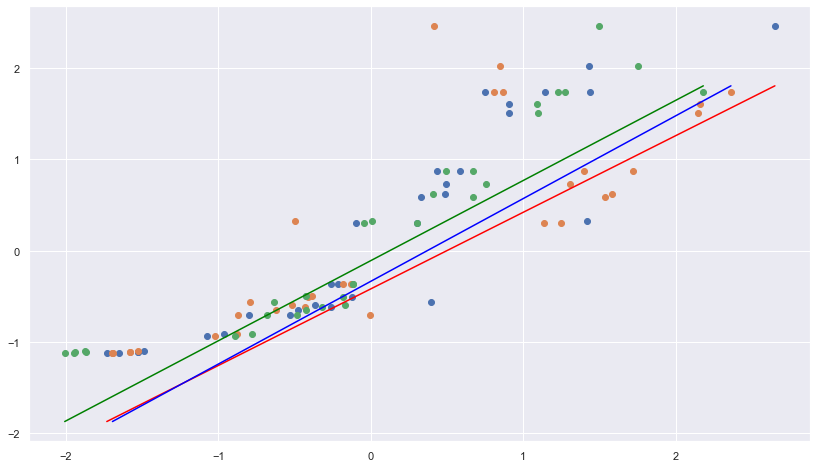

In [91]:
#Scatter Plot describing the Relation of Features and Cost with the Predicted Cost
plt.figure(figsize=(14, 8))
plt_wgt = plt.scatter(x_testS['Weight'], y_testS)
plt_wgt = plt.plot([min(x_testS['Weight']),max(x_testS['Weight'])],[min(y_pred_sgd),max(y_pred_sgd)],color = 'red')
plt_hgt = plt.scatter(x_testS['Height'], y_testS)
plt_hgt = plt.plot([min(x_testS['Height']),max(x_testS['Height'])],[min(y_pred_sgd),max(y_pred_sgd)],color = 'blue')
plt_wdt = plt.scatter(x_testS['Width'], y_testS)
plt_wdt = plt.plot([min(x_testS['Width']),max(x_testS['Width'])],[min(y_pred_sgd),max(y_pred_sgd)],color = 'green')
plt.show(plt_wgt)
plt.show(plt_hgt)
plt.show(plt_wdt)

In [92]:
print('R2 Score of OLS :',r2_OLS)
print('R2 Score of SGD :',r2_sgd)

R2 Score of OLS : 0.8739712540387259
R2 Score of SGD : -1.3813819607385218


# Gradient Descent

In [93]:
#Defining the Gradient Descent function based on the formed Equation
def gradient_descent(x1,x2,x3,y):
    w0 = 0
    w1 = 0
    w2 = 0
    w3 = 0
 
    iterations = 1000 # epochs
    n = len(x1)
    eta = 0.001
    for i in range(iterations):
        y_pred = w0 + w1*x1 + w2*x2 + w3*x3
        cost = (1/n)*sum(val**2 for val in (y-y_pred))
        w0_D = -(2/n)*sum((y-y_pred))
        w1_D = -(2/n)*sum(x1*(y-y_pred))
        w2_D = -(2/n)*sum(x2*(y-y_pred))
        w3_D = -(2/n)*sum(x3*(y-y_pred))
        
        w0 = w0 - eta * w0_D
        w1 = w1 - eta * w1_D
        w2 = w2 - eta * w2_D
        w3 = w3 - eta * w3_D
        print("w0{},w1{},w2{},w3{},iteration{},cost{}".format(w0,w1,w2,w3,i,cost)) 


In [94]:
#Parametrizing the features from the data into variables for Gradient Descent Function
x1_wgt = x_trainS['Weight']
x2_hgt = x_trainS['Height']
x3_wdt = x_trainS['Width']
x1_wgt, x2_hgt,  x3_wdt

(75    -1.146690
 138    1.747133
 2     -0.233391
 86    -0.633601
 45    -0.582292
          ...   
 71    -0.223129
 106   -0.028155
 14     0.331007
 92    -0.582292
 102   -0.099988
 Name: Weight, Length: 127, dtype: float64,
 75    -1.020250
 138   -0.266902
 2      0.812829
 86    -0.662930
 45    -0.445515
          ...   
 71     0.575071
 106   -0.260215
 14    -0.280793
 92    -0.502353
 102   -0.141877
 Name: Height, Length: 127, dtype: float64,
 75    -1.072547
 138    0.248941
 2      0.146276
 86    -0.614477
 45    -0.370772
          ...   
 71    -0.126535
 106   -0.144128
 14     0.426525
 92    -0.486662
 102    0.406748
 Name: Width, Length: 127, dtype: float64)

In [95]:
#Passing the features to the Gradient Descent Function
gradient_descent(x1_wgt,x2_hgt,x3_wdt,y_trainS)

w0-7.06203982167886e-05,w10.0017621941024569807,w20.0012872981617030443,w30.001719789249881149,iteration0,cost0.9501539564837224
w0-0.00014104093106534417,w10.00351659956853564,w20.0025680478161192576,w30.0034316507283932074,iteration1,cost0.9424467311577295
w0-0.00021126231319221287,w10.005263252339415226,w20.0038422798252226082,w30.005135621254550068,iteration2,cost0.9348107797102166
w0-0.0002812852563194294,w10.007002188189300918,w20.005110024907156173,w30.006831737476142486,iteration3,cost0.9272454410335619
w0-0.00035111046925734177,w10.008733442726200349,w20.0063713136369013285,w30.00852003587053449,iteration4,cost0.9197500601552849
w0-0.0004207386579173785,w10.010457051392696511,w20.007626176446943827,w30.01020055274545608,iteration5,cost0.9123239881811062
w0-0.0004901705253247573,w10.012173049466717066,w20.008874643627936775,w30.01187332423979224,iteration6,cost0.9049665822385354
w0-0.0005594067716311365,w10.013881472062300084,w20.010116745329360534,w30.013538386324368285,iterat

w0-0.0044389757166491085,w10.10506631646198837,w20.07496057800683341,w30.10185650374145874,iteration68,cost0.5597486861997398
w0-0.004497339203253814,w10.10636729686444903,w20.07586144067946521,w30.10310733195280522,iteration69,cost0.5556481926276414
w0-0.004555545898772739,w10.10766261459309553,w20.0767575794192965,w30.10435240992415584,iteration70,cost0.5515855237320786
w0-0.004613596343321594,w10.10895229571406115,w20.07764901658259706,w30.10559176434844772,iteration71,cost0.5475603288087303
w0-0.004671491074853165,w10.11023636617242817,w20.07853577442138109,w30.10682542179449388,iteration72,cost0.5435722604076213
w0-0.004729230629166698,w10.11151485179279086,w20.07941787508389239,w30.10805340870756054,iteration73,cost0.5396209743029206
w0-0.004786815539917231,w10.11278777827981575,w20.08029534061508722,w30.10927575140994182,iteration74,cost0.535706129463021
w0-0.0048442463386249015,w10.1140551712187993,w20.08116819295711485,w30.11049247610153166,iteration75,cost0.5318273880208922
w

w0-0.009713512865684325,w10.2134416580084143,w20.1464668377861205,w30.20470461958374292,iteration171,cost0.286167321017326
w0-0.009758219621623099,w10.21427717639183363,w20.14698209651020194,w30.20548377383058453,iteration172,cost0.2845837681544212
w0-0.009802815344561998,w10.21510916999946308,w20.14749446301103294,w30.20625936643028223,iteration173,cost0.28301471324557714
w0-0.009847300394424503,w10.21593765497240341,w20.14800395109819506,w30.20703141389930071,iteration174,cost0.2814600220305756
w0-0.009891675129746038,w10.2167626473768562,w20.14851057451678562,w30.20779993267731353,iteration175,cost0.2799195614948123
w0-0.009935939907679865,w10.21758416320447208,w20.14901434694771784,w30.20856493912756013,iteration176,cost0.2783931998577352
w0-0.009980095084002969,w10.21840221837269747,w20.1495152820080195,w30.20932644953720145,iteration177,cost0.27688080656139397
w0-0.010024141013121907,w10.21921682872511952,w20.15001339325113033,w30.21008448011767378,iteration178,cost0.275382252259

w0-0.013510612577266606,w10.27909235587798215,w20.18422504780864274,w30.26488250862091306,iteration266,cost0.18525849074368178
w0-0.013546203492472795,w10.27965574443673025,w20.184519159362906,w30.2653874704921067,iteration267,cost0.18459382540966474
w0-0.013581712109398252,w10.2802168506549585,w20.1848114401284756,w30.2658901414744164,iteration268,cost0.18393515595120724
w0-0.013617138679162515,w10.2807756849112113,w20.1851018989547143,w30.26639053217660313,iteration269,cost0.1832824269757412
w0-0.013652483451955194,w10.2813322575359264,w20.18539054464958776,w30.26688865315811394,iteration270,cost0.18263558360440726
w0-0.013687746677039824,w10.2818865788116583,w20.18567738597985736,w30.26738451492931153,iteration271,cost0.18199457146728656
w0-0.01372292860275773,w10.28243865897330106,w20.18596243167127188,w30.2678781279517025,iteration272,cost0.18135933669867957
w0-0.01375802947653185,w10.2829885082083097,w20.18624569040875852,w30.2683695026381645,iteration273,cost0.18072982593242548


w0-0.016146802424546382,w10.31814291481353024,w20.20280714252748747,w30.2991905812563631,iteration347,cost0.14686672283906516
w0-0.01617646748440906,w10.31855130273719773,w20.20297839907551538,w30.2995405018568499,iteration348,cost0.14654516239627066
w0-0.016206067877080496,w10.3189581105844002,w20.2031484225581783,w30.2998888490155331,iteration349,cost0.1462264329287698
w0-0.016235603789547814,w10.31936334548040396,w20.20331721902604163,w30.30023563000656056,iteration350,cost0.14591050838781489
w0-0.016265075408132153,w10.31976701451749145,w20.20348479450130447,w30.3005808520702755,iteration351,cost0.14559736296607437
w0-0.016294482918491383,w10.32016912475511483,w20.20365115497793157,w30.3009245224133738,iteration352,cost0.1452869710953938
w0-0.01632382650562279,w10.32056968322004836,w20.20381630642178497,w30.3012666482090605,iteration353,cost0.1449793074445755
w0-0.01635310635386577,w10.32096869690654034,w20.2039802547707548,w30.3016072365972057,iteration354,cost0.1446743469171809
w

w0-0.01838004224761599,w10.346960559168156,w20.21324479244989447,w30.3232477887662197,iteration429,cost0.12796129560416486
w0-0.018404971032784066,w10.34726037258887055,w20.21333273466586883,w30.3234901070223613,iteration430,cost0.12780333507078429
w0-0.018429848492417047,w10.34755909308128635,w20.21341985645510642,w30.3237313487839095,iteration431,cost0.12764670454785018
w0-0.018454674766921936,w10.34785672551740254,w20.21350616193104963,w30.3239715190159508,iteration432,cost0.12749139189079356
w0-0.018479449996226808,w10.34815327474670643,w20.21359165518779683,w30.324210622660506,iteration433,cost0.12733738506745915
w0-0.0185041743197827,w10.34844874559627825,w20.21367634030019253,w30.3244486646366378,iteration434,cost0.12718467215706344
w0-0.018528847876565502,w10.34874314287089525,w20.213760221323917,w30.32468564984055726,iteration435,cost0.1270332413491609
w0-0.01855347080507784,w10.3490364713531352,w20.2138433022955756,w30.3249215831457303,iteration436,cost0.1268830809426207
w0-0

w0-0.022032968525715714,w10.3860005226445897,w20.21914060923621878,w30.35264743537835663,iteration602,cost0.11317310656076161
w0-0.022050760307975717,w10.3861679010221973,w20.21913420993555444,w30.3527611595534378,iteration603,cost0.11313159028472221
w0-0.022068519282245954,w10.3863347680083355,w20.2191274774455361,w30.352874398508201,iteration604,cost0.11309035369121312
w0-0.022086245528495974,w10.3865011257944714,w20.21912041357886758,w30.35298715446226725,iteration605,cost0.11304939433838036
w0-0.022103939126448723,w10.38666697656201116,w20.2191130201396338,w30.3530994296249593,iteration606,cost0.11300870980680472
w0-0.02212160015558146,w10.3868323224823473,w20.2191052989233411,w30.35321122619535,iteration607,cost0.11296829769929366
w0-0.022139228695126658,w10.3869971657169047,w20.2190972517169572,w30.3533225463623095,iteration608,cost0.11292815564067568
w0-0.022156824824072916,w10.38716150841718716,w20.21908888029895107,w30.3534333923045529,iteration609,cost0.11288828127759602
w0-0

w0-0.023496476325434803,w10.3991207157022255,w20.21745268221048406,w30.36109755422101114,iteration691,cost0.1103432454183088
w0-0.023511635428134996,w10.39925012507195623,w20.2174228397245821,w30.3611757245784539,iteration692,cost0.11031916952699468
w0-0.023526767969286287,w10.39937918350623663,w20.21739279577289974,w30.36125357186922274,iteration693,cost0.1102952242943696
w0-0.023541874010085555,w10.3995078924616473,w20.21736255153927372,w30.3613310975609776,iteration694,cost0.11027140864267843
w0-0.023556953611551055,w10.39963625338811837,w20.2173321082018582,w30.3614083031145768,iteration695,cost0.11024772150396987
w0-0.023572006834523054,w10.39976426772896045,w20.2173014669331513,w30.36148518998410845,iteration696,cost0.11022416182000565
w0-0.023587033739664462,w10.3998919369208953,w20.21727062890002158,w30.36156175961692216,iteration697,cost0.11020072854217053
w0-0.02360203438746145,w10.40001926239408636,w20.2172395952637343,w30.36163801345366015,iteration698,cost0.110177420631383

w0-0.02565553166768513,w10.4164493520760941,w20.2106274468235661,w30.37044636591884955,iteration854,cost0.10759288971637251
w0-0.025667058510698715,w10.41653683728694346,w20.2105770227182738,w30.3704872128611538,iteration855,cost0.10758086329963575
w0-0.025678566793404415,w10.4166241395056718,w20.21052653085860656,w30.37052790494817206,iteration856,cost0.10756887527229696
w0-0.025690056554695737,w10.4167112594269019,w20.21047597177931351,w30.37056844286901636,iteration857,cost0.10755692538420535
w0-0.025701527833363536,w10.41679819774213683,w20.21042534601249924,w30.37060882730961603,iteration858,cost0.10754501338737597
w0-0.02571298066809635,w10.41688495513977425,w20.21037465408763625,w30.37064905895273237,iteration859,cost0.10753313903597043
w0-0.025724415097480722,w10.41697153230512085,w20.21032389653157732,w30.3706891384779735,iteration860,cost0.10752130208627732
w0-0.025735831160001547,w10.41705792992040663,w20.21027307386856772,w30.3707290665618089,iteration861,cost0.107509502296

w0-0.027141638285031706,w10.42745431992724425,w20.20288933384273541,w30.3750215064749258,iteration998,cost0.10616381657440901
w0-0.027150848027836405,w10.4275213045632921,w20.20283355823730329,w30.3750458225019329,iteration999,cost0.1061555295095109


In [96]:
#From the values of the Co-efficeints and Intercept generated in the last iteration we can calculate predicted value
y_pred_gd = -0.027150848027836405 + 0.4275213045632921*x1_wgt + 0.20283355823730329*x2_hgt + 0.3750458225019329*x3_wdt

In [97]:
y_pred_gd
y_trainS

75    -0.989765
138    0.493867
2     -0.159449
86    -0.792619
45    -0.677497
         ...   
71    -0.274571
106   -0.418473
14     0.588842
92    -0.706278
102   -0.274571
Name: Cost, Length: 127, dtype: float64

In [98]:
#Calculating R2 score for Gradient Descent
r2_gd = r2_score(y_trainS,y_pred_gd)
print(r2_gd)

0.8881373585052885


In [99]:
#Calculating RSE, MSE 
num_data = x_train.shape[0]
mse_gd = mean_squared_error(y_test,y_pred_sgd)
rmse_gd = math.sqrt(mse_gd)
rse_gd = mse_gd*num_data
rse_gd /= num_data-2
rse_gd = math.sqrt(rse_gd)

In [100]:
print('RMSE=',rmse_gd)
print('RSE=',rse_gd)

RMSE= 582.0017798764999
RSE= 586.6393175775763


In [101]:
#Performing Gradient Descent with Test Data
x1_wgtT = x_testS['Weight']
x2_hgtT = x_testS['Height']
x3_wdtT = x_testS['Width']
x1_wgtT.count(), x2_hgtT.head(),  x3_wdtT.head()

(32,
 78    -0.877379
 155   -1.529390
 128   -0.790545
 55    -0.128362
 94    -0.872835
 Name: Height, dtype: float64,
 78    -0.782202
 155   -1.876988
 128   -0.633310
 55    -0.118506
 94    -0.485481
 Name: Width, dtype: float64)

In [102]:
#Performing Gradient Descent with Test Data
gradient_descent(x1_wgtT,x2_hgtT,x3_wdtT,y_testS)

w00.0002802747054228793,w10.0020539583363977667,w20.0022427708855377966,w30.0022178980863796012,iteration0,cost1.1978264852052278
w00.0005595197855296585,w10.00409479544953505,w20.004469800570836277,w30.004420991250265589,iteration1,cost1.1836277826498378
w00.0008377406514631796,w10.006122599049233464,w20.006681195182953912,w30.006609378914684589,iteration2,cost1.169618559325835
w00.0011149426809157095,w10.008137456256427228,w20.00887706013614708,w30.008783159834746255,iteration3,cost1.1557962801494273
w00.001391131218347809,w10.01013945360711823,w20.011057500136656698,w30.010942432102129494,iteration4,cost1.1421584439688144
w00.0016663115752057428,w10.012128677056304538,w20.013222619187462677,w30.01308729314953857,iteration5,cost1.128702583109968
w00.0019404890301374428,w10.014105211981882523,w20.015372520593006481,w30.01521783975512928,iteration6,cost1.1154262629284912
w00.0022136688292070305,w10.01606914318852277,w20.017507306963881947,w30.0173341680469054,iteration7,cost1.102327081

w00.037415958808455184,w10.22010894364484584,w20.2255059693769911,w30.23102658422302105,iteration176,cost0.23199107175666728
w00.037574865251695795,w10.22079753736185118,w20.2261204087517279,w30.23170866092858305,iteration177,cost0.23063555565240526
w00.037733331205303554,w10.22148210942299548,w20.22673011396302337,w30.23238624351584888,iteration178,cost0.22929778544681803
w00.03789135855513154,w10.22216268645716084,w20.2273351171982309,w30.23305936213365244,iteration179,cost0.22797752443167985
w00.038048949176397444,w10.22283929491457538,w20.22793545042840824,w30.23372804672823333,iteration180,cost0.22667453906520105
w00.03820610493375094,w10.22351196106801313,w20.22853114540976976,w30.23439232704459773,iteration181,cost0.22538859892964722
w00.03836282768134066,w10.22418071101398582,w20.22912223368512918,w30.23505223262787037,iteration182,cost0.22411947668952723
w00.038519119262880666,w10.22484557067392677,w20.22970874658533239,w30.2357077928246372,iteration183,cost0.22286694805033913

w00.050776005786426444,w10.27074881195518113,w20.2665826432257153,w30.2793572589525919,iteration271,cost0.1577335195935374
w00.05090020511980465,w10.27115291420767723,w20.26686522599397683,w30.27972281911882013,iteration272,cost0.15733757097121712
w00.051024103701798156,w10.2715548701304876,w20.26714534005927343,w30.2800860072298754,iteration273,cost0.15694659432607355
w00.051147702655690186,w10.27195469377561476,w20.26742300238108174,w30.28044683917345664,iteration274,cost0.1565605237624776
w00.051271003098900945,w10.27235239910087683,w20.26769822980483055,w30.280805330730478,iteration275,cost0.15617929426523985
w00.05139400614302369,w10.2727479999705403,w20.26797103906266667,w30.28116149757578623,iteration276,cost0.15580284168782998
w00.051516712893860506,w10.2731415101559482,w20.26824144677421535,w30.28151535527887367,iteration277,cost0.1554311027407532
w00.051639124451457914,w10.27353294333614414,w20.26850946944733595,w30.28186691930458574,iteration278,cost0.15506401498008338
w00.0

w00.0639006962240721,w10.30742045521691364,w20.28690193352602206,w30.31016304693295804,iteration392,cost0.13257590296492872
w00.06399523611853707,w10.3076443738439859,w20.2869816881080739,w30.31033143029710036,iteration393,cost0.13248135531811325
w00.06408957727025913,w10.3078673137374482,w20.28706038099798664,w30.3104987601188629,iteration394,cost0.1323878142340533
w00.06418372029849556,w10.3080892811306595,w20.2871380196866724,w30.3106650434227853,iteration395,cost0.13229526673091668
w00.06427766581966814,w10.30831028221530504,w20.28721461161456857,w30.31083028718617944,iteration396,cost0.1322036999994955
w00.06437141444737964,w10.3085303231416762,w20.2872901641719765,w30.31099449833944703,iteration397,cost0.13211310140089902
w00.06446496679243013,w10.30874941001894834,w20.2873646846993984,w30.3111576837663947,iteration398,cost0.13202345846427674
w00.06455832346283323,w10.30896754891545697,w20.2874381804878714,w30.31131985030454706,iteration399,cost0.13193475888457282
w00.06465148506

w00.0713626025008379,w10.3236585377402203,w20.29055058598907374,w30.32142204345250264,iteration478,cost0.1270940088009571
w00.0714420552727063,w10.3238173376661709,w20.2905618958017594,w30.32152126960845484,iteration479,cost0.12705225061825998
w00.07152135367554534,w10.32397556766223223,w20.29057263399215616,w30.3216199021277375,iteration480,cost0.1270108307864811
w00.07160049813541264,w10.3241332312324626,w20.29058280474527437,w30.32171794494257056,iteration481,cost0.12696974518067858
w00.07167948907662211,w10.3242903318575747,w20.2905924122178448,w30.32181540195873215,iteration482,cost0.12692898973022695
w00.07175832692175341,w10.3244468729950923,w20.2906014605385087,w30.3219122770557363,iteration483,cost0.1268885604180926
w00.07183701209166139,w10.3246028580795059,w20.2906099538080062,w30.32200857408700945,iteration484,cost0.12684845328011882
w00.07191554500548557,w10.32475829052242755,w20.2906178960993636,w30.3221042968800661,iteration485,cost0.12680866440432054
w00.071993926080659

w00.07893465365454604,w10.3377795767207913,w20.28928285994555486,w30.32922568152231596,iteration583,cost0.12398628055948177
w00.07899993740885755,w10.3378939478417169,w20.28925249537331316,w30.32927983519286597,iteration584,cost0.12396500649349868
w00.07906510354351785,w10.33800801445732176,w20.2892218744394868,w30.3293336920483583,iteration585,cost0.12394383454162952
w00.0791301523439603,w10.3381217783085715,w20.28919099919337676,w30.3293872540250254,iteration586,cost0.12392276365900022
w00.07919508409461153,w10.3382352411249229,w20.28915987167034346,w30.3294405230460804,iteration587,cost0.12390179281404695
w00.07925989907889644,w10.3383484046244012,w20.2891284938919009,w30.32949350102180436,iteration588,cost0.12388092098833996
w00.07932459757924322,w10.3384612705136766,w20.28909686786580924,w30.3295461898496334,iteration589,cost0.1238601471764097
w00.07938917987708817,w10.33857384048814065,w20.2890649955861675,w30.3295985914142451,iteration590,cost0.12383947038557472
w00.079453646252

w00.08815119788431287,w10.35328652683378353,w20.28212982384383756,w30.3351793892754196,iteration745,cost0.1213998801520649
w00.0882005650354588,w10.3533680187634515,w20.28207708052440805,w30.3352036395714439,iteration746,cost0.12138741061910212
w00.08824985046476959,w10.3534493800968432,w20.2820242818913024,w30.335227784504513,iteration747,cost0.12137496979157351
w00.0882990543432362,w10.3535306114359542,w20.2819714286148436,w30.3352518247241344,iteration748,cost0.12136255751749979
w00.08834817684136627,w10.35361171337891106,w20.2819185213606761,w30.3352757608754562,iteration749,cost0.12135017364648652
w00.08839721812918605,w10.3536926865199973,w20.2818655607897975,w30.3352995935992969,iteration750,cost0.12133781802970411
w00.08844617837624241,w10.3537735314496792,w20.2818125475585898,w30.3353233235321746,iteration751,cost0.12132549051986781
w00.08849505775160478,w10.35385424875463134,w20.2817594823188503,w30.3353469513063357,iteration752,cost0.12131319097121804
w00.08854385642386703,w

w00.09215753464831007,w10.35994383681574754,w20.2773959270073091,w30.3369551365726085,iteration832,cost0.12040920861307007
w00.09220038446159576,w10.3600158606490565,w20.2773404460529081,w30.3369722467519951,iteration833,cost0.12039879935106985
w00.09224316580811696,w10.3600877941850392,w20.2772849535124058,w30.3369892944863585,iteration834,cost0.12038840984895943
w00.09228587882317614,w10.3601596377699307,w20.2772294497472104,w30.33700628013754996,iteration835,cost0.12037804003910334
w00.09232852364172982,w10.3602313917478087,w20.2771739351161294,w30.3370232040650007,iteration836,cost0.12036768985440445
w00.09237110039838986,w10.36030305646060806,w20.2771184099753869,w30.3370400666257381,iteration837,cost0.12035735922829795
w00.0924136092274247,w10.3603746322481351,w20.27706287467864105,w30.3370568681744021,iteration838,cost0.12034704809474474
w00.09245605026276058,w10.3604461194480817,w20.27700732957700136,w30.33707360906326117,iteration839,cost0.12033675638822526
w00.092498423637982

In [103]:
#Calculating Predicted values of Test Data
y_pred_gd_T = 0.0984578931147321 + 0.37092911667176137*x1_wgtT + 0.26817928933819746*x2_hgtT + 0.33916122460780795*x3_wdtT

In [104]:
y_pred_gd_T.count(),y_testS.count()

(32, 32)

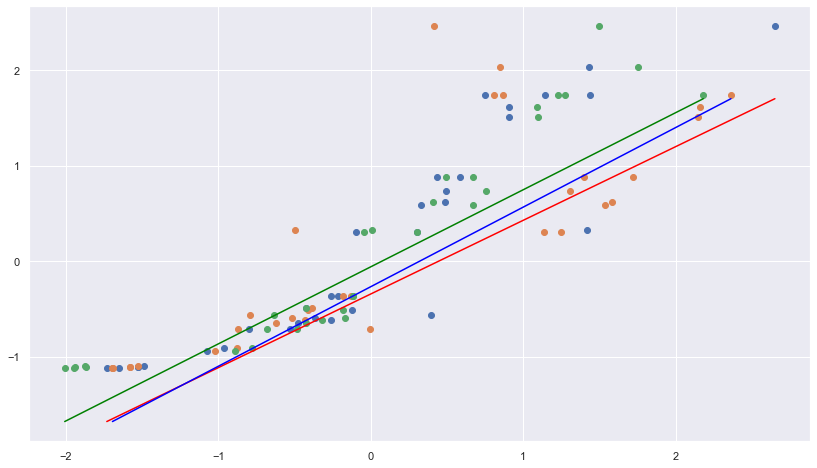

In [105]:
#Scatter Plot describing the Relation of Features and Cost with the Predicted Cost
plt.figure(figsize=(14, 8))
plt_wgt = plt.scatter(x_testS['Weight'], y_testS)
plt_wgt = plt.plot([min(x_testS['Weight']),max(x_testS['Weight'])],[min(y_pred_gd_T),max(y_pred_gd_T)],color = 'red')
plt_hgt = plt.scatter(x_testS['Height'], y_testS)
plt_hgt = plt.plot([min(x_testS['Height']),max(x_testS['Height'])],[min(y_pred_gd_T),max(y_pred_gd_T)],color = 'blue')
plt_wdt = plt.scatter(x_testS['Width'], y_testS)
plt_wdt = plt.plot([min(x_testS['Width']),max(x_testS['Width'])],[min(y_pred_gd_T),max(y_pred_gd_T)],color = 'green')
plt.show(plt_wgt)
plt.show(plt_hgt)
plt.show(plt_wdt)

In [106]:
#Calculating R2 for Test Data
r2_gdT = r2_score(y_testS,y_pred_gd_T)
print(r2_gdT)

0.8990844526376047


In [107]:
#Calculating MSE, RSE, RMSE for Test Data
num_data = x_train.shape[0]
mse = mean_squared_error(y_train,y_pred_gd)
rmse_gdT = math.sqrt(mse)
rse_gd = mse*num_data
rse_gd /= num_data-2
rse_gdT = math.sqrt(rse_gd)

In [108]:
print('RMSE=',rmse_gdT)
print('RSE=',rse_gdT)

RMSE= 510.6835110559897
RSE= 514.7527667141816


In [109]:
print('R2 Score of OLS :',r2_OLS)
print('R2 Score of SGD :',r2_sgd)
print('R2 Score of GD Training :',r2_gd)
print('R2 Score of GD Test:',r2_gdT)


R2 Score of OLS : 0.8739712540387259
R2 Score of SGD : -1.3813819607385218
R2 Score of GD Training : 0.8881373585052885
R2 Score of GD Test: 0.8990844526376047


# Mini Batch Gradient Descent

In [110]:
#Defining the function to split the data into batches
def split_dataframe(df, size = 16): 
    chunks = list()
    num_chunks = len(df) // size + 1
    for i in range(num_chunks):
        chunks.append(df[i*size:(i+1)*size])
    return chunks

In [111]:
#Defining the Mini Batch Gradient Descent function 
def minibatch_gradient_descent(x1,x2,x3,y):
    w0 = 0
    w1 = 0
    w2 = 0
    w3 = 0
 
    iterations = 20 # epochs
    n = len(x1)
    n1 = n-1
    eta = 0.035
    for i in range(iterations):
        y_pred = w0 + w1*x1 + w2*x2 + w3*x3
        cost = (1/n)*sum(val**2 for val in (y-y_pred))
        w0_D = -(2/n)*sum((y-y_pred))
        w1_D = -(2/n)*sum(x1*(y-y_pred))
        w2_D = -(2/n)*sum(x2*(y-y_pred))
        w3_D = -(2/n)*sum(x3*(y-y_pred))
        
        w0 = w0 - eta * w0_D
        w1 = w1 - eta * w1_D
        w2 = w2 - eta * w2_D
        w3 = w3 - eta * w3_D
        
        if i == n1:
            print("w0:{},w1:{},w2:{},w3:{},iteration:{},cost:{}".format(w0,w1,w2,w3,i,cost)) 
            

In [112]:
#Parametrizing the Batches into variable dataframes
x1_wgt_batches = split_dataframe(x1_wgt)
x2_hgt_batches = split_dataframe(x2_hgt)
x3_wdt_batches = split_dataframe(x3_wdt)
y_trainS_batches = split_dataframe(y_trainS)


In [113]:
#Performing Mini Batch Gradient Descent for each batch
count = len(x1_wgt_batches)
for i in range(count):
    minibatch_gradient_descent(x1_wgt_batches[i],x2_hgt_batches[i],x3_wdt_batches[i],y_trainS_batches[i])

w0:-0.12698700566813947,w1:0.29751681337580665,w2:0.23826018633848206,w3:0.27725443367307606,iteration:15,cost:0.041462454778084586
w0:0.03665497700941941,w1:0.3723371179011453,w2:0.22379930501087086,w3:0.3580028328379504,iteration:15,cost:0.07767658741913619
w0:-0.07982352054688113,w1:0.27557774086899933,w2:0.285617589682034,w3:0.36634772315999375,iteration:15,cost:0.04852891699652831
w0:0.06866664702902198,w1:0.4251121421724799,w2:0.23037637443947373,w3:0.41547262738333063,iteration:15,cost:0.12408247622466265
w0:-0.047031358723947994,w1:0.3162510996651569,w2:0.2807152144496698,w3:0.34340464112210856,iteration:15,cost:0.0601082472017299
w0:0.08297696934877336,w1:0.6025032445815746,w2:0.09543564188474742,w3:0.3431880788312423,iteration:15,cost:0.19562227111219246
w0:-0.16972687550568766,w1:0.20300626648523512,w2:0.21055548468413554,w3:0.2248577492184141,iteration:15,cost:0.03604736486307632
w0:-0.05680451430273765,w1:0.2678033045042656,w2:0.22443215322224705,w3:0.36782387238230485,ite

In [114]:
#Putting the values of the Co-efficients and Intercept into individual dataframes
df_mini_w0 = pd.DataFrame(data = (-0.12698700566813947,0.03665497700941941,-0.07982352054688113,0.06866664702902198,
                                  -0.047031358723947994,0.08297696934877336,-0.16972687550568766,-0.05680451430273765))
df_mini_w1 = pd.DataFrame(data = (0.29751681337580665,0.3723371179011453,0.27557774086899933,0.4251121421724799,
                                  0.3162510996651569,0.6025032445815746,0.20300626648523512,0.2678033045042656))
df_mini_w2 = pd.DataFrame(data = (0.23826018633848206,0.22379930501087086,0.285617589682034,0.23037637443947373,
                                  0.2807152144496698,0.09543564188474742,0.21055548468413554,0.22443215322224705))
df_mini_w3 = pd.DataFrame(data = (0.27725443367307606,0.3580028328379504,0.36634772315999375,0.41547262738333063,
                                  0.34340464112210856,0.3431880788312423,0.2248577492184141,0.36782387238230485))

In [115]:
#Calculating the mean value for each of the Co-efficients and Intercept
w0m = df_mini_w0.mean()
w1m = df_mini_w1.mean()
w2m = df_mini_w2.mean()
w3m = df_mini_w3.mean()
w0m, w1m, w2m, w3m

(0   -0.036509
 dtype: float64,
 0    0.345013
 dtype: float64,
 0    0.223649
 dtype: float64,
 0    0.337044
 dtype: float64)

In [116]:
#Calculating the Predicted values for Mini-Batch Gradient Descent
y_pred_mbgd = -0.001127 + 0.02691*x1_wgt + 0.019615*x2_hgt + 0.026272*x3_wdt

In [117]:
y_pred_mbgd.count()

127

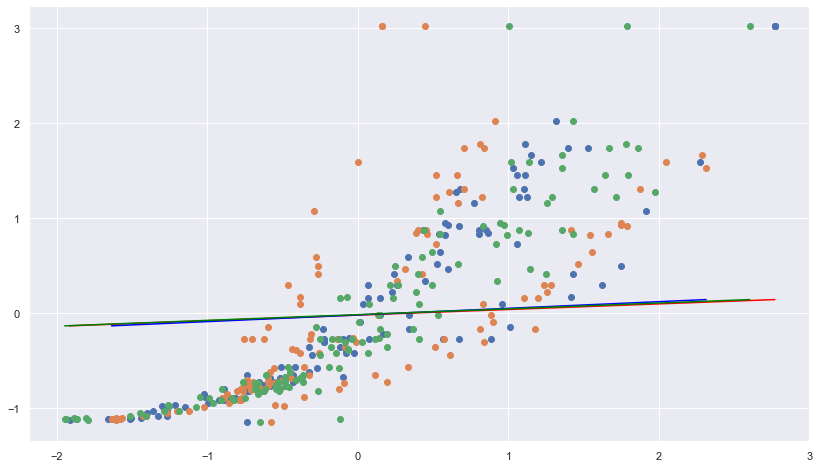

In [118]:
# plt_wgt_mb = plt.scatter(x_trainS['Weight'], y_trainS)
# plt_wgt_mb = plt.plot([min(x_trainS['Weight']),max(x_trainS['Weight'])],[min(y_pred_mbgd),max(y_pred_mbgd)],color = 'red')

#Scatter Plot describing the Relation of Features and Cost with the Predicted Cost
plt.figure(figsize=(14, 8))
plt_wgt = plt.scatter(x_trainS['Weight'], y_trainS)
plt_wgt = plt.plot([min(x_trainS['Weight']),max(x_trainS['Weight'])],[min(y_pred_mbgd),max(y_pred_mbgd)],color = 'red')
plt_hgt = plt.scatter(x_trainS['Height'], y_trainS)
plt_hgt = plt.plot([min(x_trainS['Height']),max(x_trainS['Height'])],[min(y_pred_mbgd),max(y_pred_mbgd)],color = 'blue')
plt_wdt = plt.scatter(x_trainS['Width'], y_trainS)
plt_wdt = plt.plot([min(x_trainS['Width']),max(x_trainS['Width'])],[min(y_pred_mbgd),max(y_pred_mbgd)],color = 'green')
plt.show(plt_wgt)
plt.show(plt_hgt)
plt.show(plt_wdt)

In [119]:
#Calculating the R2 value for Mini Batch Gradient Descent
r2_mbgd = r2_score(y_trainS,y_pred_mbgd)
print(r2_mbgd)

0.11857272058833856


In [120]:
num_data = x_train.shape[0]
mse_mgd = mean_squared_error(y_train,y_pred_gd)
rmse_mgd = math.sqrt(mse_mgd)
rse_mgd = mse*num_data
rse_mgd /= num_data-2
rse_mgd = math.sqrt(rse_mgd)

In [121]:
print('RMSE=',rmse_mgd)
print('RSE=',rse_mgd)

RMSE= 510.6835110559897
RSE= 514.7527667141816


<h1><b>Conclusions and Evaluations</b></h1>

In [122]:
#Consolidating all the evaluation parameters in a dataframe
d = {'R2 Score': [r2_OLS,r2_sgd,r2_gd,r2_mbgd], 'MSE': [mse_ols, mse_sgd, mse_gd, mse_mgd], 
     'RSE': [rse_ols,rse_sgd,rse_gd,rse_mgd], 'RMSE':[rmse_ols,rmse_sgd,rmse_gd,rmse_mgd]}
df_result = pd.DataFrame(data=d)
df_result.index = ['OLS', 'Stochastic Gradient Descent', 'Gradient Descent', 'Mini Batch Gradient Descent']
pd.set_option('float_format', '{:f}'.format)
df_result

,R2 Score,MSE,RSE,RMSE
OLS,0.873971,17926.238946,134.955766,133.888905
Stochastic Gradient Descent,-1.381382,0.139877,0.376982,0.374001
Gradient Descent,0.888137,338726.071779,264970.410840,582.001780
Mini Batch Gradient Descent,0.118573,260797.648464,514.752767,510.683511


<blockquote> The above table collates all the Evaluation parameters of all the models used for prediction

    From the above table we can see that the Mini Batch Gradient and Stochastic Gradient Descent have given the least performance
    Similarly, we can see that OLS and Gradient Descent Models have better performance
</blockquote>

<blockquote><h4>Hence, we can conclude that OLS and Gradient Descent are the best fit for this data</h4></blockquote>